# Prerequisites part of the Data 4 Health Challenge

## Import libraries

In [36]:
import pandas as pd
from datetime import datetime
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from datetime import time

In [37]:
parent_directory = os.path.dirname(os.getcwd())
sys.path.append(parent_directory)  

from utils.utils import load_data, transform_data, merge_data

## Import data

In [38]:
data = load_data()
data = transform_data(data)

df = data['JAN24']

/Users/guillaumeplassais/Documents/HEC/Data_4_health/utils/utils.py:77: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  data["intervenants"]["Compétences"]


## Merge data

In [39]:
df_merge = merge_data(data)

In [40]:
df_merge.head()

,ID Client,ID Intervenant,Date,Heure de début,Heure de fin,Prestation,geometry_client,Permis,Véhicule personnel,ACCOMPAGNEMENTS COURSES,...,2024-01-22 00:00:00,2024-01-23 00:00:00,2024-01-24 00:00:00,2024-01-25 00:00:00,2024-01-26 00:00:00,2024-01-27 00:00:00,2024-01-28 00:00:00,2024-01-29 00:00:00,2024-01-30 00:00:00,2024-01-31 00:00:00
0,559475456,162858075,2024-01-01,2024-01-01 07:15:00,2024-01-01 07:45:00,REPAS,POINT (1.37569 48.72105),1.0,1.0,False,...,1,1,1,1,0,1,1,1,1,1
1,559475456,162858075,2024-01-02,2024-01-02 07:20:00,2024-01-02 07:50:00,REPAS,POINT (1.37569 48.72105),1.0,1.0,False,...,1,1,1,1,0,1,1,1,1,1
2,559475456,162858075,2024-01-04,2024-01-04 07:20:00,2024-01-04 07:50:00,REPAS,POINT (1.37569 48.72105),1.0,1.0,False,...,1,1,1,1,0,1,1,1,1,1
3,559475456,162858075,2024-01-08,2024-01-08 12:30:00,2024-01-08 13:15:00,REPAS,POINT (1.37569 48.72105),1.0,1.0,False,...,1,1,1,1,0,1,1,1,1,1
4,559475456,162858075,2024-01-09,2024-01-09 07:20:00,2024-01-09 07:50:00,REPAS,POINT (1.37569 48.72105),1.0,1.0,False,...,1,1,1,1,0,1,1,1,1,1


## Define constraints linked to each type of services

In [41]:
df.Prestation.value_counts()

Prestation
TOILETTE                      1217
REPAS                          910
AIDE MENAGERE                  443
VIE SOCIALE                     96
ACCOMPAGNEMENTS COURSES PA      83
ADMINISTRATION                  79
FORMATION                       15
COORDINATION                    10
GARDE D'ENFANTS                 10
FEMME DE MENAGE                  4
HOMMES TOUTES MAINS              2
VISITE MEDICALE                  1
Name: count, dtype: int64

In [42]:
source = df[['Prestation','Heure de début']]
source['Heure de début'] = source['Heure de début'].dt.hour + source['Heure de début'].dt.minute/60

step = 40
overlap = 1

alt.Chart(source, height=step).transform_timeunit(
    Hour='hours(Heure de début)'
).transform_bin(
    ['bin_max', 'bin_min'], 'Heure de début'
).transform_aggregate(
    value='count()', groupby=['Prestation', 'Hour', 'bin_min', 'bin_max']
).transform_impute(
    impute='value', groupby=['Prestation', 'Hour'], key='bin_min', value=0
).mark_area(
    interpolate='monotone',
    fillOpacity=0.8,
    stroke='lightgray',
    strokeWidth=.5
).encode(
    alt.X('bin_min:O', title='Heure de début'),
    alt.Y('value:Q', axis=None, scale=alt.Scale(range=[step, -step * overlap])),
    alt.Fill('Hour:Q', title='Hour of the day', scale=alt.Scale(scheme='redyellowblue'))
).facet(
    row=alt.Row('Prestation:N', title=None, header=alt.Header(labelAngle=0, labelAlign='left')),
    title='Seattle Weather',
    bounds='flush'
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
).configure_title(
    anchor='end'
)

/var/folders/rc/66gswm2j3lv9bdjptr8vkghm0000gn/T/ipykernel_46697/1875949675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source['Heure de début'] = source['Heure de début'].dt.hour + source['Heure de début'].dt.minute/60


alt.FacetChart(...)

/var/folders/rc/66gswm2j3lv9bdjptr8vkghm0000gn/T/ipykernel_46697/2530409655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Heure de début'] = df_['Heure de début'].dt.hour + df_['Heure de début'].dt.minute/60
/opt/homebrew/anaconda3/envs/env_gust_usa_pricing/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/env_gust_usa_pricing/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to

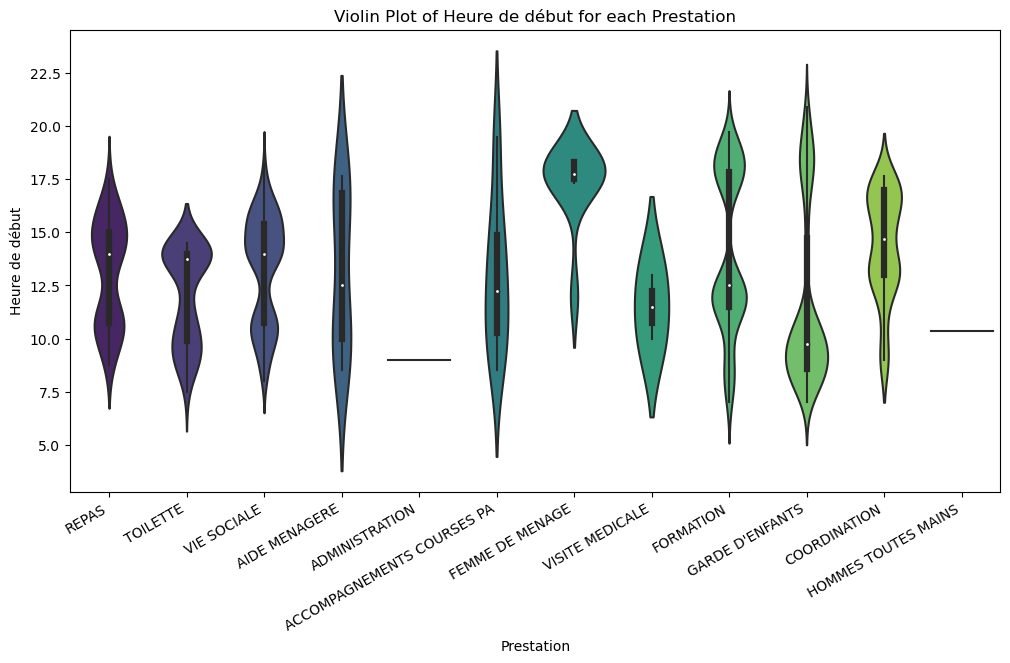

In [43]:
df_ = df[['Prestation','Heure de début']]
df_['Heure de début'] = df_['Heure de début'].dt.hour + df_['Heure de début'].dt.minute/60


# Plot violin plot for 'Heure de début' distribution for each 'Prestation'
plt.figure(figsize=(12, 6))
ax = sns.violinplot(data=df_, x='Prestation', y='Heure de début', palette='viridis')

# Set x-tick positions and labels
xtick_positions = range(len(df['Prestation'].unique()))
xtick_labels = df['Prestation'].unique()
ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels, rotation=30, ha='right')

plt.title('Violin Plot of Heure de début for each Prestation')
plt.xlabel('Prestation')
plt.ylabel('Heure de début')
plt.show()

<AxesSubplot:>

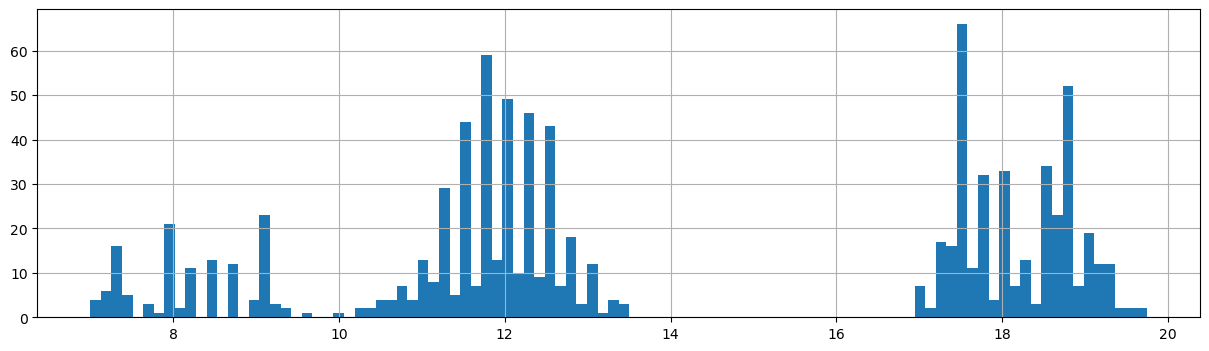

In [60]:
df_merge[df_merge.Prestation == 'REPAS']['Heure de début'].apply(lambda x: x.hour + x.minute/60).hist(figsize=(15,4), bins=100)


## Segment clients

In [50]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

df_merge_client = df_merge.drop_duplicates(subset='ID Client')

# Assuming 'geometry_client' column contains Shapely Point geometries
df_merge_client['x'] = df_merge_client['geometry_client'].apply(lambda point: point.x)
df_merge_client['y'] = df_merge_client['geometry_client'].apply(lambda point: point.y)

# Create a Folium map centered at the first location
map_center = [df_merge_client['y'].iloc[0], df_merge_client['x'].iloc[0]]
my_map = folium.Map(location=map_center, zoom_start=10)

# Create a MarkerCluster to group markers
marker_cluster = MarkerCluster().add_to(my_map)

# Add a marker for each row in the DataFrame
for index, row in df_merge_client.iterrows():
    folium.Marker([row['y'], row['x']], popup=row['ID Client']).add_to(marker_cluster)

# Save the map to an HTML file or display it
my_map


/var/folders/rc/66gswm2j3lv9bdjptr8vkghm0000gn/T/ipykernel_46697/4215694073.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_client['x'] = df_merge_client['geometry_client'].apply(lambda point: point.x)
/var/folders/rc/66gswm2j3lv9bdjptr8vkghm0000gn/T/ipykernel_46697/4215694073.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_client['y'] = df_merge_client['geometry_client'].apply(lambda point: point.y)


In [51]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

df_merge_inter = df_merge.drop_duplicates(subset='ID Intervenant')

# Assuming 'geometry_client' column contains Shapely Point geometries
df_merge_inter['x'] = df_merge_inter['geometry_intervenant'].apply(lambda point: point.x)
df_merge_inter['y'] = df_merge_inter['geometry_intervenant'].apply(lambda point: point.y)

# Create a Folium map centered at the first location
map_center = [df_merge_inter['y'].iloc[0], df_merge_inter['x'].iloc[0]]
my_map = folium.Map(location=map_center, zoom_start=10)

# Create a MarkerCluster to group markers
marker_cluster = MarkerCluster().add_to(my_map)

# Add a marker for each row in the DataFrame
for index, row in df_merge_inter.iterrows():
    folium.Marker([row['y'], row['x']], popup=row['ID Client']).add_to(marker_cluster)

# Save the map to an HTML file or display it
my_map


/var/folders/rc/66gswm2j3lv9bdjptr8vkghm0000gn/T/ipykernel_46697/714244843.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_inter['x'] = df_merge_inter['geometry_intervenant'].apply(lambda point: point.x)
/var/folders/rc/66gswm2j3lv9bdjptr8vkghm0000gn/T/ipykernel_46697/714244843.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_inter['y'] = df_merge_inter['geometry_intervenant'].apply(lambda point: point.y)


## Segment days

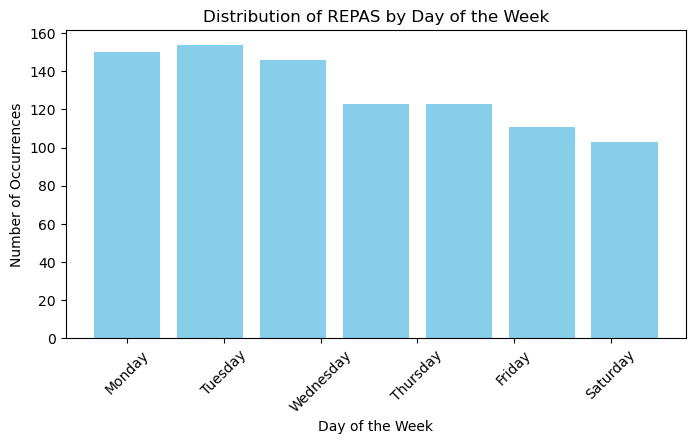

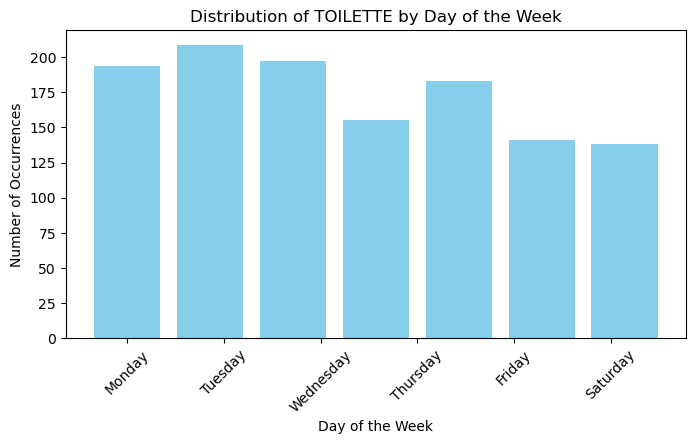

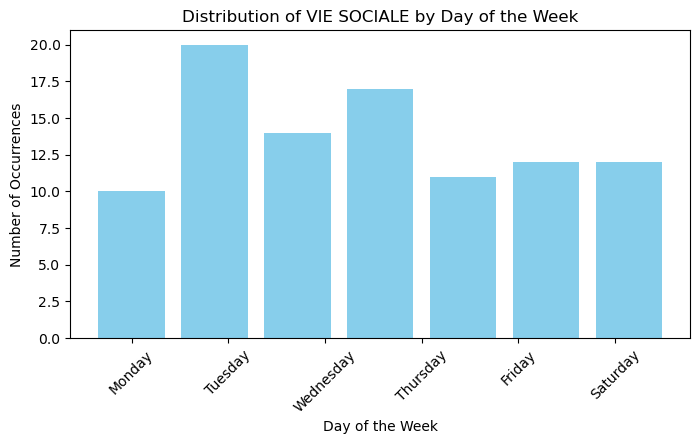

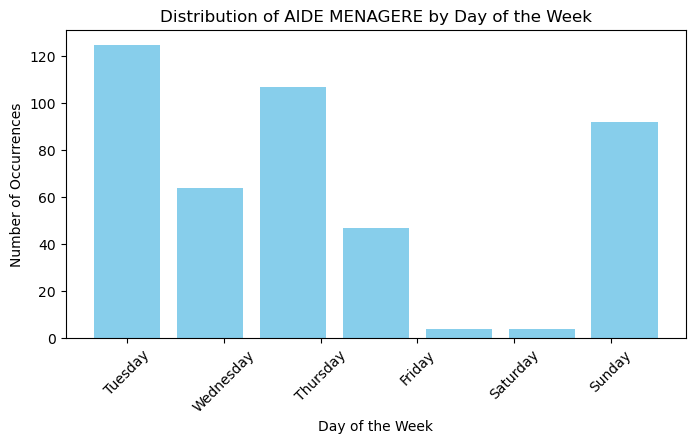

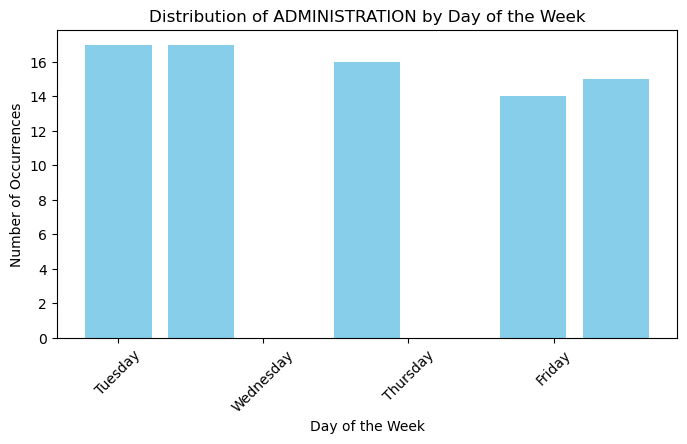

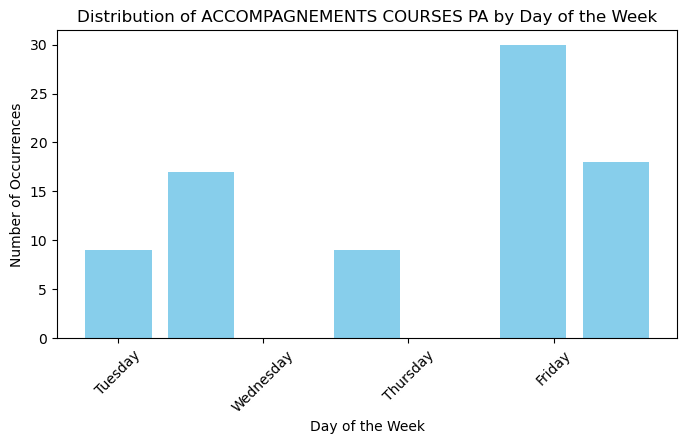

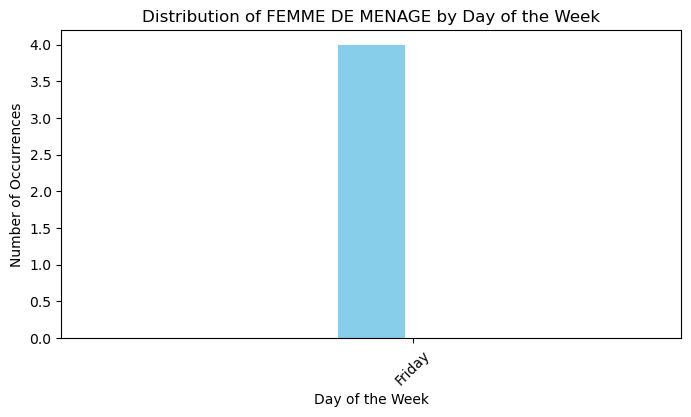

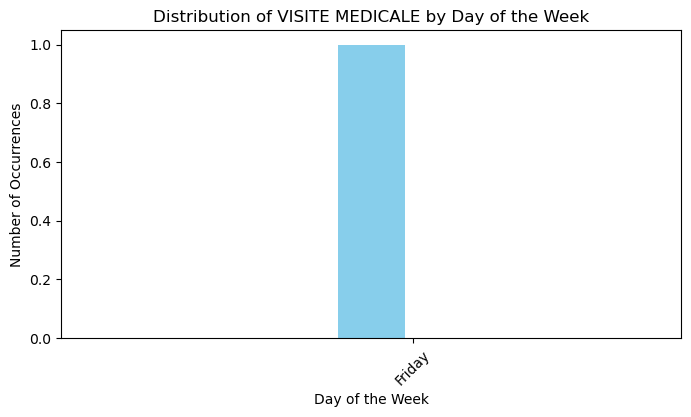

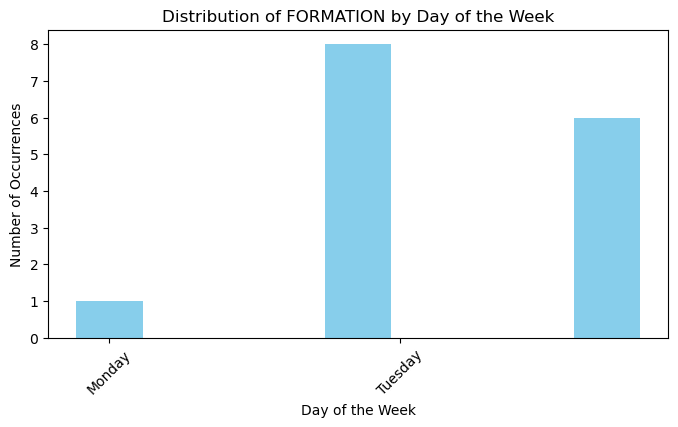

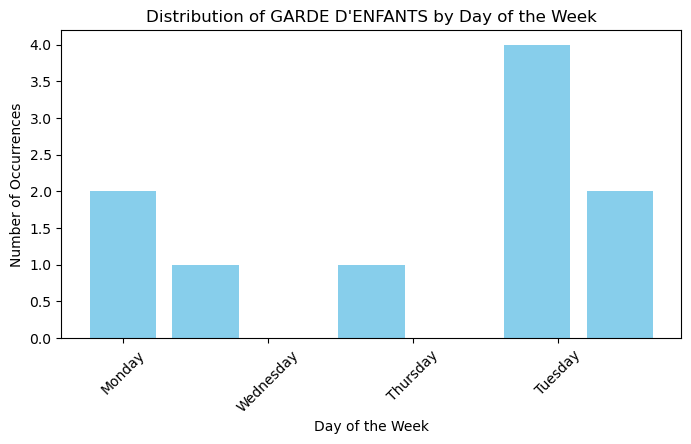

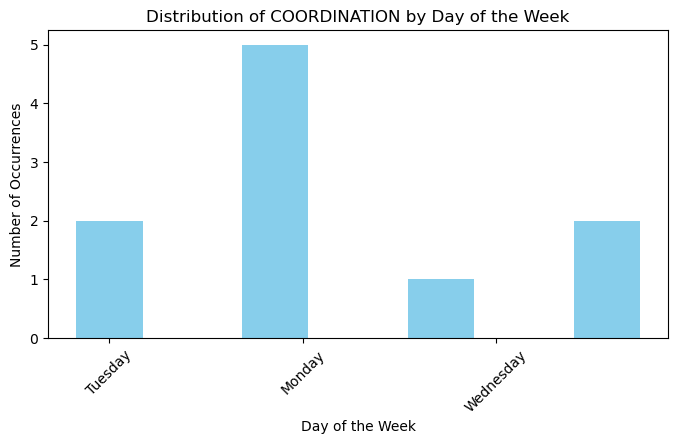

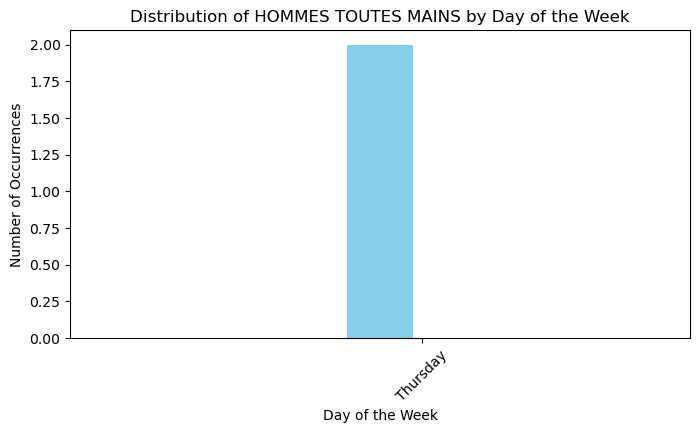

In [15]:
df['Day_of_Week'] = df['Date'].dt.day_name()

# Plot histograms for each 'Prestation' and day of the week
for prestation in df['Prestation'].unique():
    plt.figure(figsize=(8, 4))
    plt.hist(df[df['Prestation'] == prestation]['Day_of_Week'], bins=7, align='left', rwidth=0.8, color='skyblue')
    plt.title(f'Distribution of {prestation} by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Occurrences')
    plt.xticks(rotation=45)
    plt.show()

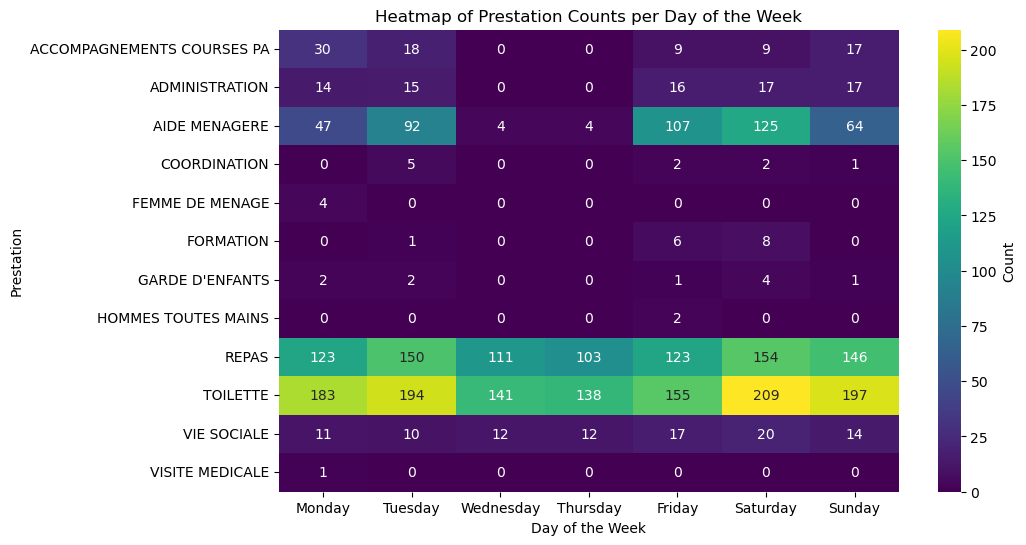

In [16]:
df['Day_of_Week'] = df['Date'].dt.day_name()

# Define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a pivot table for heatmap
heatmap_data = df.pivot_table(index='Prestation', columns='Day_of_Week', aggfunc='size', fill_value=0)

# Plot the heatmap with custom day order and color scale
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Count'}, xticklabels=day_order)
plt.title('Heatmap of Prestation Counts per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Prestation')
plt.show()

## Conclusion of the segmentation study

### Necessary to perform the optimsation

In [ ]:
drop_prestations = [
    "ADMINISTRATION",
    "FORMATION",
    "COORDINATION",
    "HOMMES TOUTES MAINS",
    "VISITE MEDICALE",
]

working_hours = {
    "all_day": [{"start": time(8, 0), "end": time(17, 0)}],
    "day_&_night": [{"start": time(0, 0), "end": time(23, 59)}],
    "meals": [
        {"start": time(7, 0), "end": time(13, 0)},
        {"start": time(17, 0), "end": time(20, 0)},
    ],
    "washs": [
        {"start": time(7, 0), "end": time(12, 0)},
        {"start": time(14, 0), "end": time(21, 0)},
    ],
}


prestation_hours = {
    "TOILETTE": working_hours["washs"],
    "REPAS": working_hours["meals"],
    "AIDE MENAGERE": working_hours["all_day"],
    "VIE SOCIALE": working_hours["all_day"],
    "ACCOMPAGNEMENTS COURSES PA": working_hours["all_day"],
    "GARDE D'ENFANTS ": working_hours["all_day"],
    "FEMME DE MENAGE": working_hours["all_day"],
}

# Importance of 1 => not possible to change the day
# Importance of 2 => possible to change the day
prestation_importance = {
    "TOILETTE": 1,
    "REPAS": 1,
    "AIDE MENAGERE": 2,
    "VIE SOCIALE": 2,
    "ACCOMPAGNEMENTS COURSES PA": 2,
    "GARDE D'ENFANTS ": 1,
    "FEMME DE MENAGE": 1,
}

# value of 1 means that this day should be consider first if possible,
# value of 2 means that if it is possible we prefer to choose a day with a value of 1
segmentation_days = {0: "1", 1: "1", 2: "1", 3: "1", 4: "1", 5: "2", 6: "2"}
